<a href="https://colab.research.google.com/github/thepseudoartist/Tensorflow-Basics/blob/master/MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# loading the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

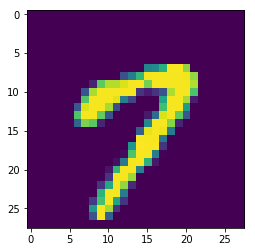

In [0]:
sample_image = x_train[15].reshape(28, 28)
plt.imshow(sample_image)

In [0]:
print(sample_image.min(), sample_image.max(), sep='\n')

0
255


In [0]:
# normalizing the data points
x_train, x_test = x_train / 255., x_test / 255.
x_train, x_test = x_train.reshape((-1, 28, 28, 1)), x_test.reshape((-1, 28, 28, 1))

In [0]:
print(y_train[15])

7


In [0]:
# one hot encoding the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [0]:
print(x_train.shape)

(60000, 28, 28, 1)


In [0]:
# initializing the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), strides=(1, 1), padding="same", activation=tf.nn.relu),
    tf.keras.layers.Conv2D(64, (5, 5), strides=(1, 1), padding="same", activation=tf.nn.relu),

    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),    
    tf.keras.layers.Conv2D(128, (5, 5), strides=(1, 1), padding="same", activation=tf.nn.relu),

    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


# compiling model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=256, epochs=10, )
model.evaluate(x_test, y_test)

Epoch 1/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.1908 - acc: 0.9409
Epoch 2/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0476 - acc: 0.9849
Epoch 3/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0352 - acc: 0.9889
Epoch 4/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0283 - acc: 0.9910
Epoch 5/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0235 - acc: 0.9927
Epoch 6/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0202 - acc: 0.9934
Epoch 7/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0184 - acc: 0.9942
Epoch 8/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0162 - acc: 0.9948
Epoch 9/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0142 - acc: 0.9954
Epoch 10/10
10000/10000 [==============================] - 1s 78us/sample

[0.021955563945462928, 0.9938]

In [0]:
print(tf.__version__)

1.13.1
